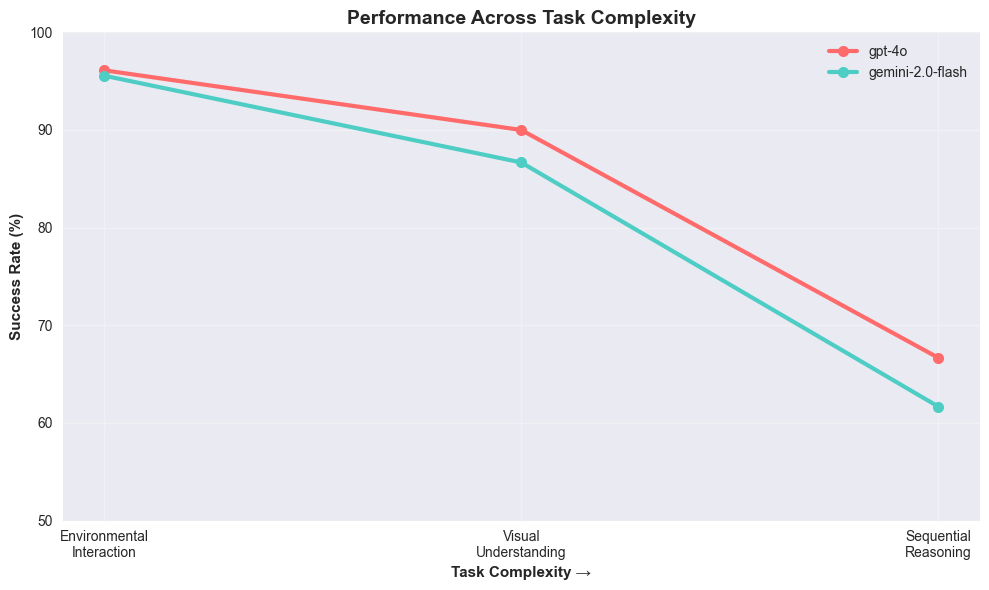

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better aesthetics
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read the data
df = pd.read_csv('data.csv')

# Add percentage columns for proper comparison
df['Success Rate Numeric'] = df['Success Rate'].str.rstrip('%').astype(float)
df['Total'] = df['Success'] + df['Failure'] + df['Error']
df['Success Percentage'] = (df['Success'] / df['Total'] * 100)
df['Failure Percentage'] = (df['Failure'] / df['Total'] * 100)
df['Error Percentage'] = (df['Error'] / df['Total'] * 100)

# Create figure with single subplot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Color scheme
model_colors = {'gpt-4o': '#FF6B6B', 'gemini-2.0-flash': '#4ECDC4'}

# Performance Across Task Complexity
types_ordered = ['ENVIRONMENTAL_INTERACTION', 'VISUAL_UNDERSTANDING', 'SEQUENTIAL_REASONING']
for model in df[df['Type'] != 'OVERALL']['Model'].unique():
    model_data = df[(df['Model'] == model) & (df['Type'] != 'OVERALL')]
    success_rates = []
    failure_rates = []
    error_rates = []
    
    for task_type in types_ordered:
        task_row = model_data[model_data['Type'] == task_type].iloc[0]
        success_rates.append(task_row['Success Percentage'])
        failure_rates.append(task_row['Failure Percentage'])
        error_rates.append(task_row['Error Percentage'])
        
    # Plot success rates
    ax.plot(range(len(types_ordered)), success_rates, 'o-', linewidth=3, 
         markersize=8, label=f'{model} - Success', color=model_colors[model])
    
    # Plot failure rates
    ax.plot(range(len(types_ordered)), failure_rates, 's--', linewidth=2, 
         markersize=6, label=f'{model} - Failure', color=model_colors[model], alpha=0.7)
    
    # Plot error rates
    ax.plot(range(len(types_ordered)), error_rates, '^:', linewidth=2, 
         markersize=6, label=f'{model} - Error', color=model_colors[model], alpha=0.5)

ax.set_xlabel('Task Complexity →', fontweight='bold')
ax.set_ylabel('Rate (%)', fontweight='bold')
ax.set_title('Performance Across Task Complexity (Success, Failure, and Error Rates)', fontweight='bold', fontsize=14)
ax.set_xticks(range(len(types_ordered)))
ax.set_xticklabels(['Environmental\nInteraction', 'Visual\nUnderstanding', 'Sequential\nReasoning'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()
